In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset (use your file path if in Colab or local)
df = pd.read_csv('/content/student_feedback.csv')
df.head()


,Unnamed: 0,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
0,0,340,5,2,7,6,9,2,1,8
1,1,253,6,5,8,6,2,1,2,9
2,2,680,7,7,6,5,4,2,3,1
3,3,806,9,6,7,1,5,9,4,6
4,4,632,8,10,8,4,6,6,9,9


In [ ]:
print(df.columns)


Index(['Unnamed: 0', 'Student ID', 'Well versed with the subject',
       'Explains concepts in an understandable way', 'Use of presentations',
       'Degree of difficulty of assignments', 'Solves doubts willingly',
       'Structuring of the course',
       'Provides support for students going above and beyond',
       'Course recommendation based on relevance'],
      dtype='object')


In [ ]:
# Check for missing values
print(df.isnull().sum())

# Ensure columns are of correct datatype
df.dtypes

# Optional: Normalize rating scale to 1–5 if needed
for col in df.columns[2:]:
    df[col] = df[col].apply(lambda x: round(x / 2))


Unnamed: 0                                              0
Student ID                                              0
Well versed with the subject                            0
Explains concepts in an understandable way              0
Use of presentations                                    0
Degree of difficulty of assignments                     0
Solves doubts willingly                                 0
Structuring of the course                               0
Provides support for students going above and beyond    0
Course recommendation based on relevance                0
dtype: int64


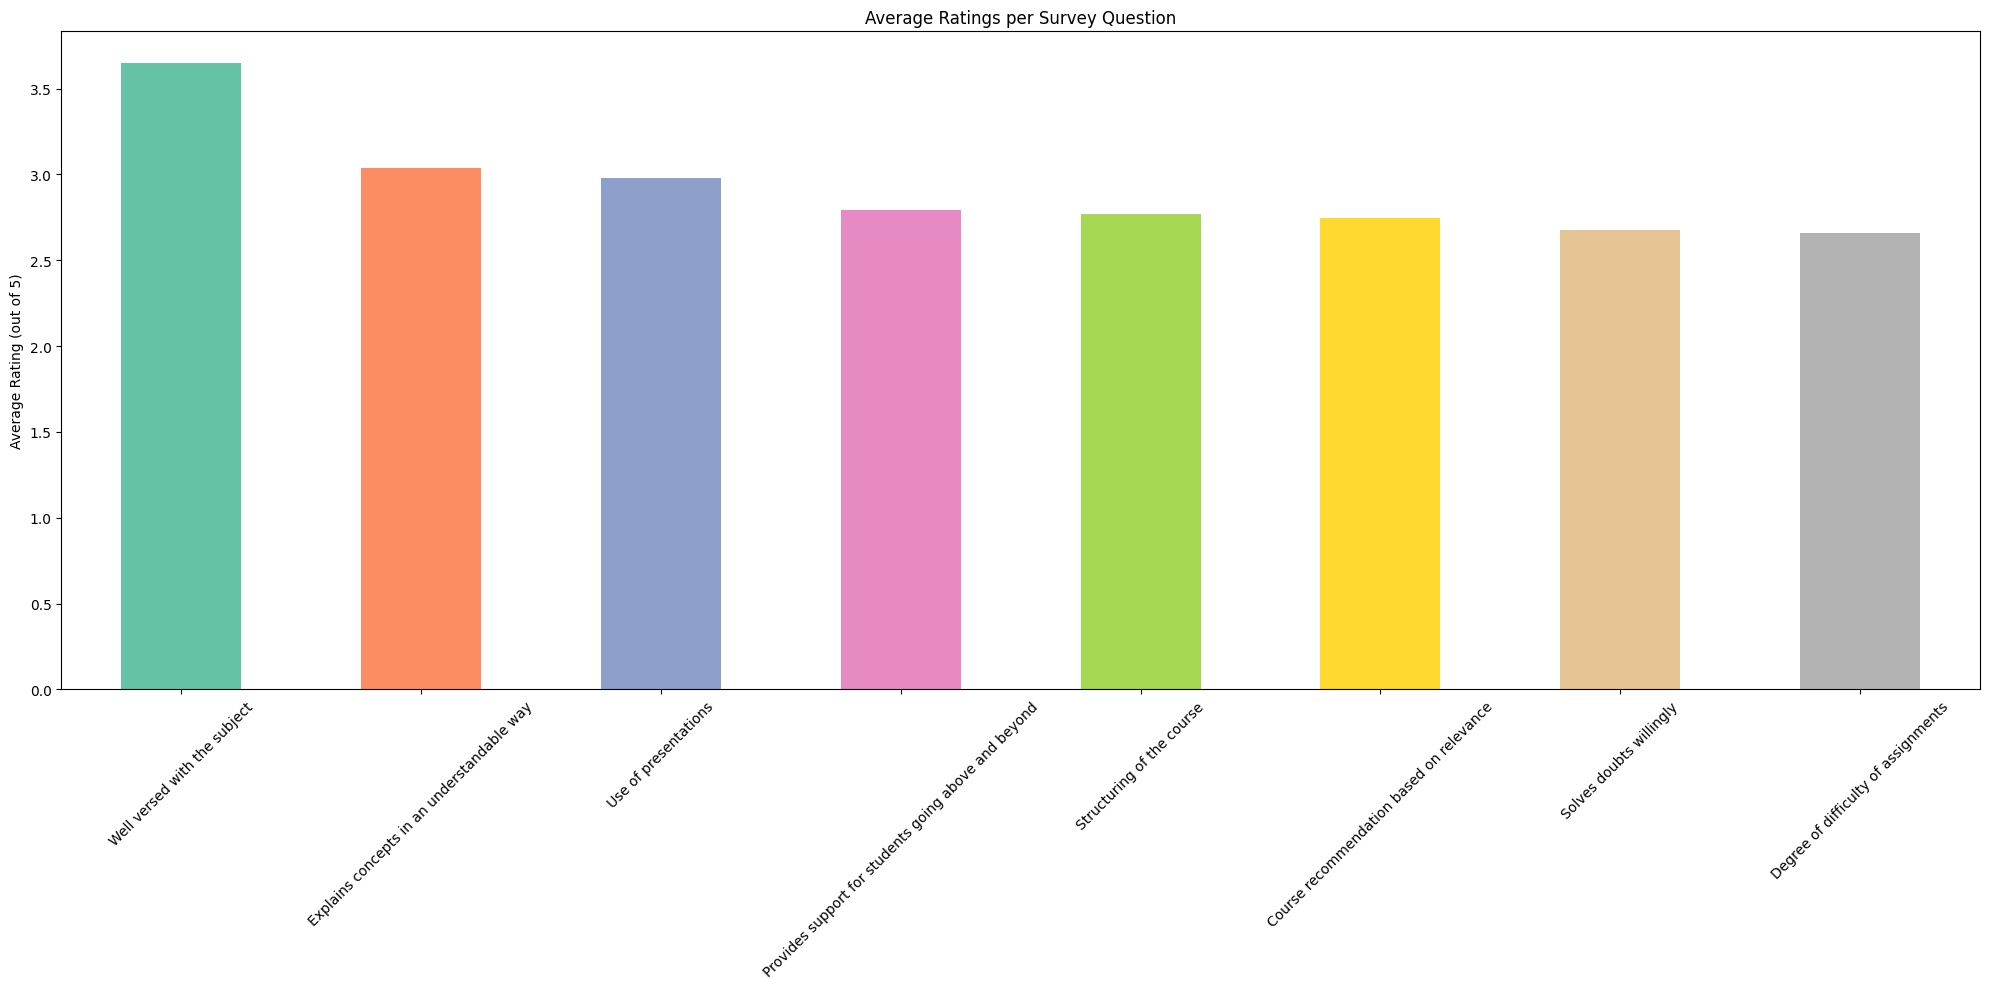

In [ ]:

avg_ratings = df.iloc[:, 2:].mean().sort_values(ascending=False)
colors = sns.color_palette("Set2", len(avg_ratings))  # You can try "pastel", "Set3", "husl", etc.
avg_ratings.plot(kind='bar', figsize=(20, 10), title='Average Ratings per Survey Question', color=colors)
plt.ylabel('Average Rating (out of 5)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



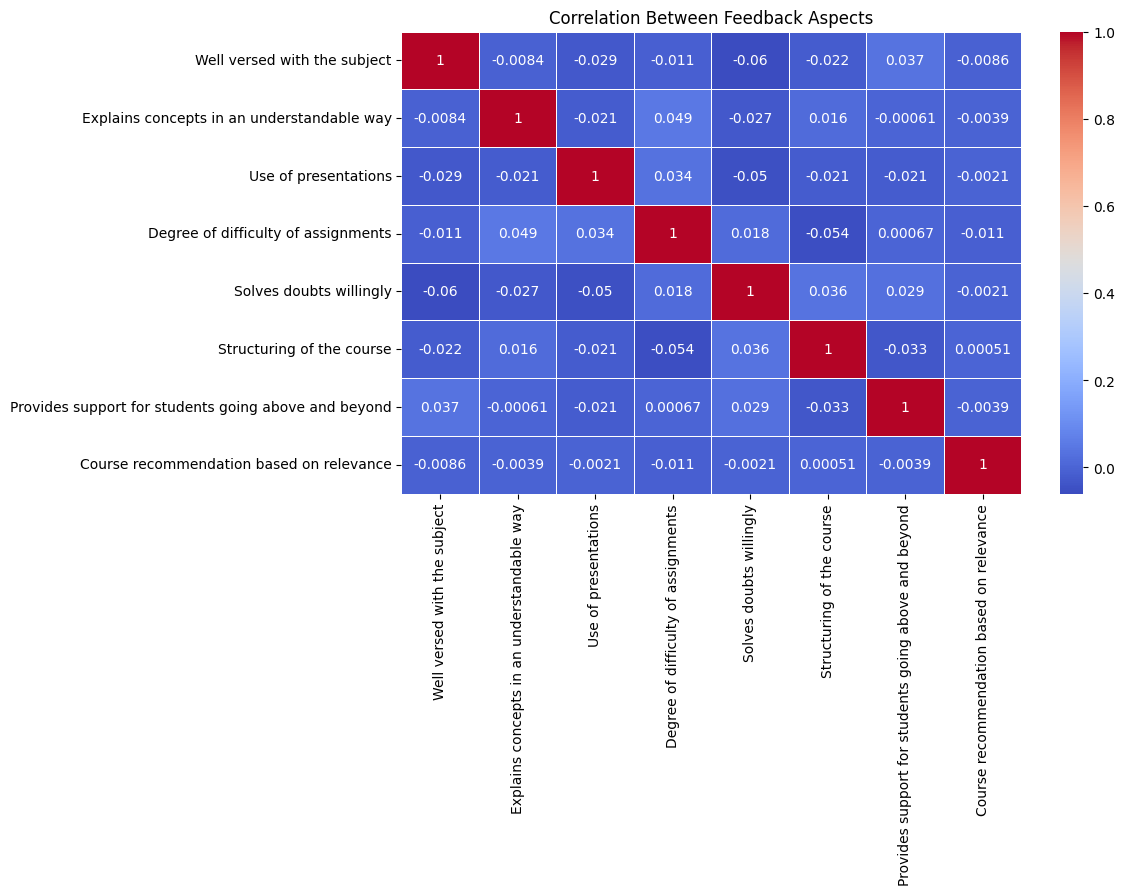

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.iloc[:,2:].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Between Feedback Aspects')
plt.show()


In [ ]:
dummy_feedback = [
    "The course was excellent and very helpful.",
    "Too hard to follow. Needs improvement.",
    "Good explanations but assignments were tough.",
    "Instructor was supportive and solved doubts well.",
    "Average course, nothing special."
]

# Create a new column with all NaNs
df['Feedback'] = pd.NA

# Assign feedback only to the first 5 rows
df.loc[:4, 'Feedback'] = dummy_feedback


In [ ]:
dummy_feedback = [
    "The course was excellent and very helpful.",
    "Too hard to follow. Needs improvement.",
    "Good explanations but assignments were tough.",
    "Instructor was supportive and solved doubts well.",
    "Average course, nothing special."
]

# Repeat the list to match number of rows in df
df['Feedback'] = dummy_feedback * (len(df) // len(dummy_feedback)) + dummy_feedback[:len(df) % len(dummy_feedback)]


/tmp/ipython-input-60-341197254.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment Category', data=df, palette='pastel')


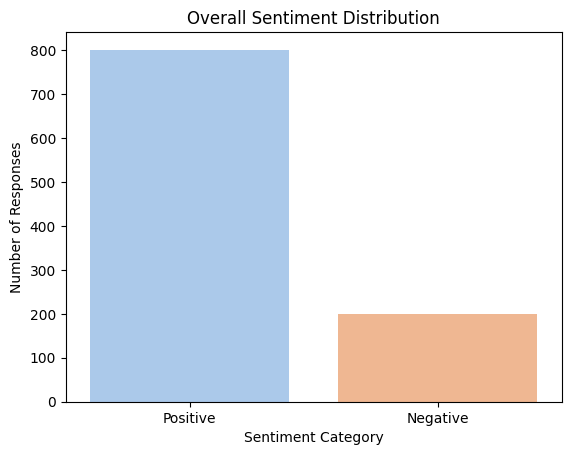

In [ ]:
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt

# Compute sentiment polarity and category
df['Sentiment'] = df['Feedback'].apply(lambda text: TextBlob(str(text)).sentiment.polarity)
df['Sentiment Category'] = df['Sentiment'].apply(
    lambda score: 'Positive' if score > 0 else 'Negative' if score < 0 else 'Neutral'
)

# Plot
sns.countplot(x='Sentiment Category', data=df, palette='pastel')
plt.title('Overall Sentiment Distribution')
plt.xlabel('Sentiment Category')
plt.ylabel('Number of Responses')
plt.show()


In [ ]:
top_aspects = avg_ratings.head(3)
print("Top 3 well-rated aspects of the course:")
print(top_aspects)


Top 3 well-rated aspects of the course:
Well versed with the subject                  3.651349
Explains concepts in an understandable way    3.037962
Use of presentations                          2.977023
dtype: float64


In [ ]:
bottom_aspects = avg_ratings.tail(3)
print("Bottom 3 rated aspects that need improvement:")
print(bottom_aspects)


Bottom 3 rated aspects that need improvement:
Course recommendation based on relevance    2.745255
Solves doubts willingly                     2.679321
Degree of difficulty of assignments         2.659341
dtype: float64


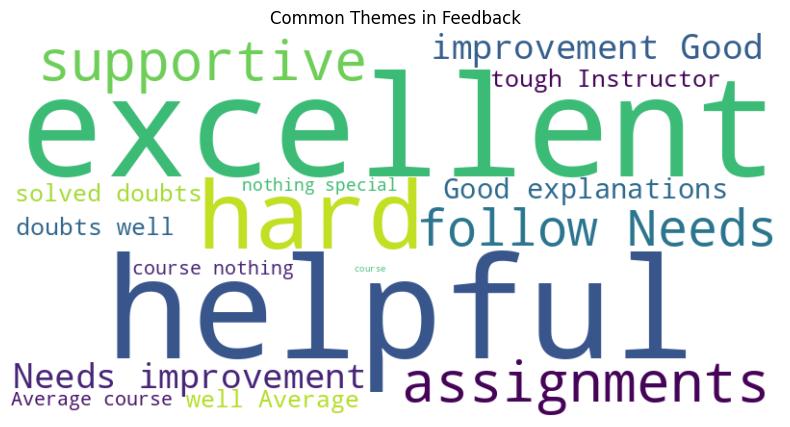

In [ ]:
from wordcloud import WordCloud

text = " ".join(str(comment) for comment in df['Feedback'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Common Themes in Feedback")
plt.show()


/tmp/ipython-input-64-1001419715.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ratings_mean.index, y=ratings_mean.values, palette="coolwarm")


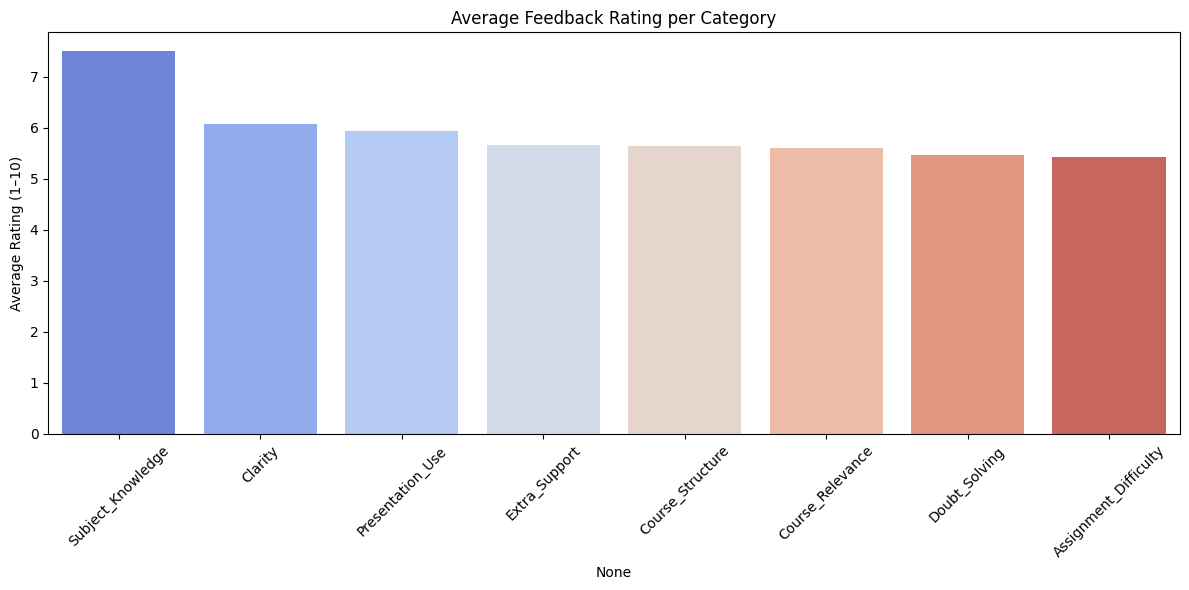

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(x=ratings_mean.index, y=ratings_mean.values, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Average Feedback Rating per Category")
plt.ylabel("Average Rating (1–10)")
plt.tight_layout()
plt.show()


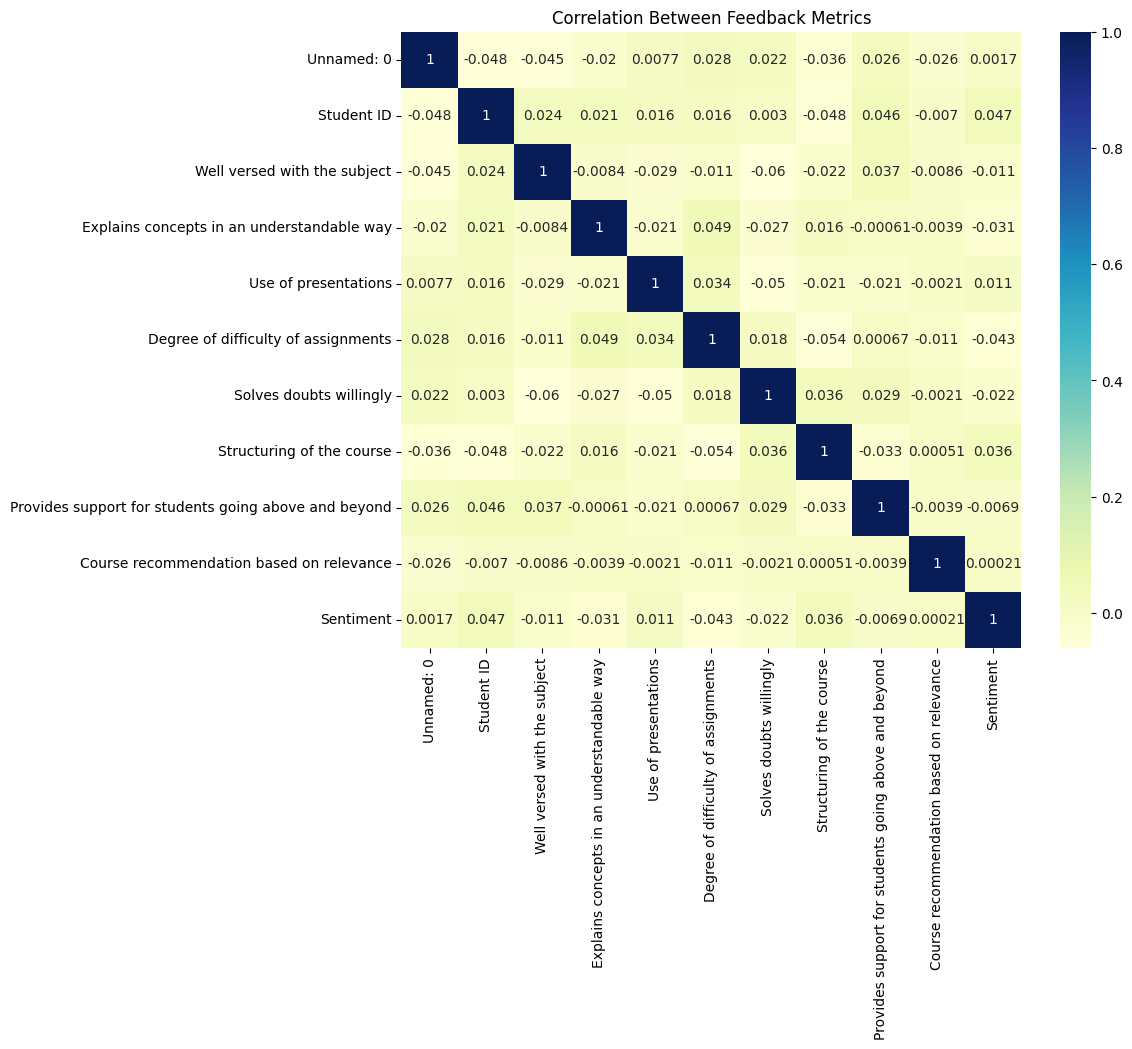

In [ ]:
# Step 1: Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Step 2: Plot heatmap using only numeric data
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="YlGnBu")
plt.title("Correlation Between Feedback Metrics")
plt.show()



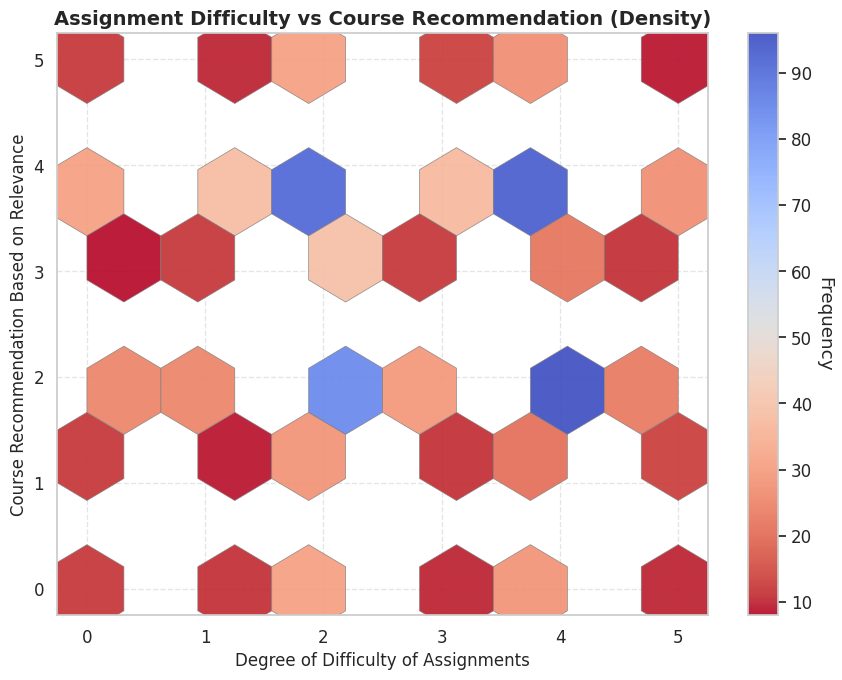

In [ ]:
sns.set(style="whitegrid", font_scale=1.1)

plt.figure(figsize=(9, 7))

hb = plt.hexbin(
    df["Degree of difficulty of assignments"],
    df["Course recommendation based on relevance"],
    gridsize=8,  # Larger hexagons
    cmap='coolwarm_r',
    linewidths=0.5,
    edgecolors='gray',  # Changed from white to gray
    alpha=0.9,
    mincnt=1
)

cbar = plt.colorbar(hb)
cbar.set_label("Frequency", rotation=270, labelpad=15)

plt.xlabel("Degree of Difficulty of Assignments", fontsize=12)
plt.ylabel("Course Recommendation Based on Relevance", fontsize=12)
plt.title("Assignment Difficulty vs Course Recommendation (Density)", fontsize=14, weight='bold')

plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

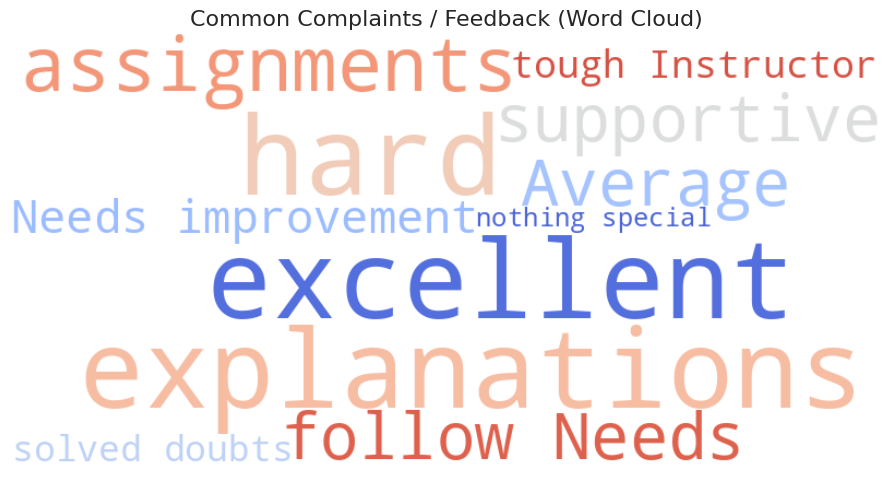

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Combine all feedback comments into one string
text = " ".join(df["Feedback"].astype(str))

# Define custom stopwords (to remove generic or positive words)
stopwords = set(STOPWORDS)
stopwords.update(["event", "session", "speaker", "good", "great", "nice", "well", "like", "also", "students", "course", "helpful"])

# Generate Word Cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=stopwords,
    colormap='coolwarm',  # cool colors + reds for emphasis
    max_words=100,
    max_font_size=100,
    contour_width=1,
    contour_color='steelblue'
).generate(text)

# Display the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Common Complaints / Feedback (Word Cloud)", fontsize=16)
plt.tight_layout()
plt.show()


In [ ]:
df.to_csv("cleaned_feedback.csv", index=False)
